# PROJECT NAME:Credit Card Approval Prediction
Author:Pradip Ravindra Jagdale

# IMPORTING THE  Library

In [1]:
import pandas as pd  
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
pd.pandas.set_option('display.max_columns',None)
import datetime
from datetime import timedelta

# Importing Data

In [2]:
credit_record= pd.read_csv("credit.csv")
credit_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [3]:
application_details=pd.read_csv("C:\\Users\\Dell\\OneDrive\\Documents\\project\\credit card project\\application_record.csv")
application_details

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


# Data Summary

# credit

In [4]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
credit_record.tail()

,ID,MONTHS_BALANCE,STATUS
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C
1048574,5150487,-29,C


In [6]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [7]:
credit_record.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


In [8]:
credit_record.describe().T # transpose

,count,mean,std,min,25%,50%,75%,max
ID,1048575.0,5.068286e+06,46150.578505,5001711.0,5023644.0,5062104.0,5113856.0,5150487.0
MONTHS_BALANCE,1048575.0,-1.913700e+01,14.023498,-60.0,-29.0,-17.0,-7.0,0.0


In [9]:
credit_record.isnull().sum()  # Null Value

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [10]:
credit_record.duplicated().sum() 

0

# Application

In [11]:
application_details.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [12]:
application_details.tail()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0
438556,6842885,F,N,Y,0,121500.0,Working,Secondary / secondary special,Married,House / apartment,-18858,-1201,1,0,1,0,Sales staff,2.0


In [13]:
application_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [14]:
application_details.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [15]:
application_details.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,438557.0,6.022176e+06,571637.023257,5008804.0,5609375.0,6047745.0,6456971.0,7999952.0
CNT_CHILDREN,438557.0,4.273903e-01,0.724882,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,438557.0,1.875243e+05,110086.853066,26100.0,121500.0,160780.5,225000.0,6750000.0
DAYS_BIRTH,438557.0,-1.599790e+04,4185.030007,-25201.0,-19483.0,-15630.0,-12514.0,-7489.0
DAYS_EMPLOYED,438557.0,6.056368e+04,138767.799647,-17531.0,-3103.0,-1467.0,-371.0,365243.0
FLAG_MOBIL,438557.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,438557.0,2.061328e-01,0.404527,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,438557.0,2.877710e-01,0.452724,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,438557.0,1.082071e-01,0.310642,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,438557.0,2.194465e+00,0.897207,1.0,2.0,2.0,3.0,20.0


In [16]:
application_details.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

There are 134203 missing occupations in application_details DataFrame. We can't remove these lables, instead of doing 
that I'll try to fill occupation details based on the insights from countplot of categorical features.​We found that, 
majority jobs for male applicants are :- labours, and drivers majority jobs for female applicants are :- sales staff, 
and labours

In [17]:
application_details.duplicated().sum()

0

In [18]:
len(set(application_details['ID'])) # how many unique ID in application record?

438510

In [19]:
len(set(credit_record['ID'])) # how many unique ID in credit record?

45985

In [20]:
len(set(application_details['ID']).intersection(set(credit_record['ID']))) # how many IDs do two tables share?

36457


So, I think there are only 36,457 information that can be used for judgment

Checking Skewness

In [21]:
application_details.skew()

C:\Users\Dell\AppData\Local\Temp/ipykernel_14916/3618091883.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  application_details.skew()


ID                  0.212718
CNT_CHILDREN        1.806941
AMT_INCOME_TOTAL    8.834066
DAYS_BIRTH         -0.160181
DAYS_EMPLOYED       1.739495
FLAG_MOBIL          0.000000
FLAG_WORK_PHONE     1.452898
FLAG_PHONE          0.937568
FLAG_EMAIL          2.522482
CNT_FAM_MEMBERS     0.919676
dtype: float64

Count Plot of Categorical Features: application_details

In [4]:
def countplot_applicants(features):
    for feature in features:
        plt.figure(figsize=(9, 9))
        ax=sns.countplot(y=application_details[feature], hue='CODE_GENDER' , data=application_details)
        plt.legend(loc='best')
        total = len(application_details[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

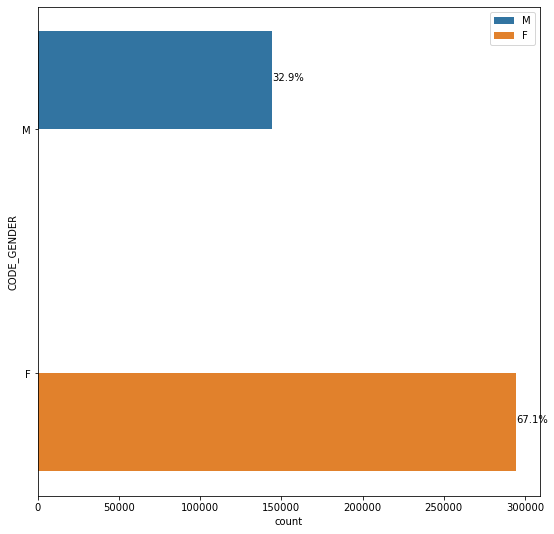

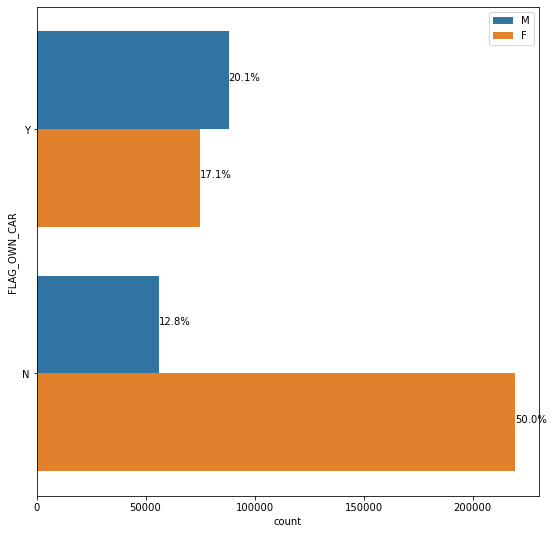

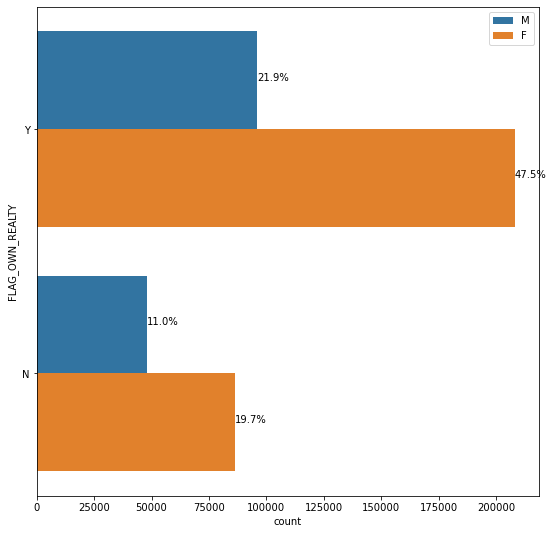

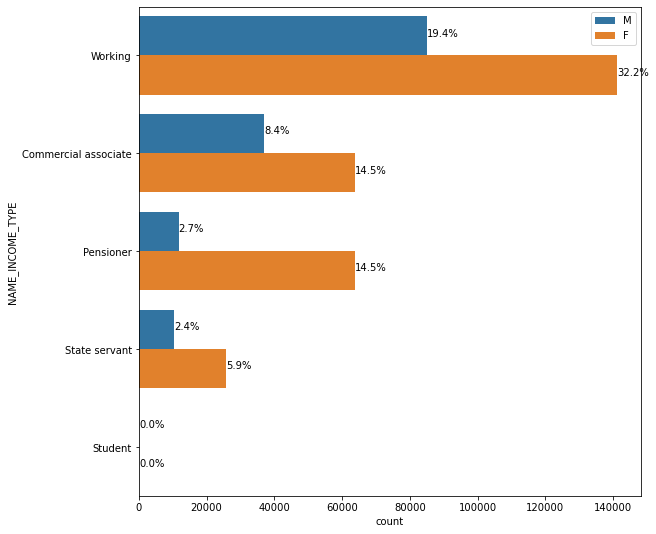

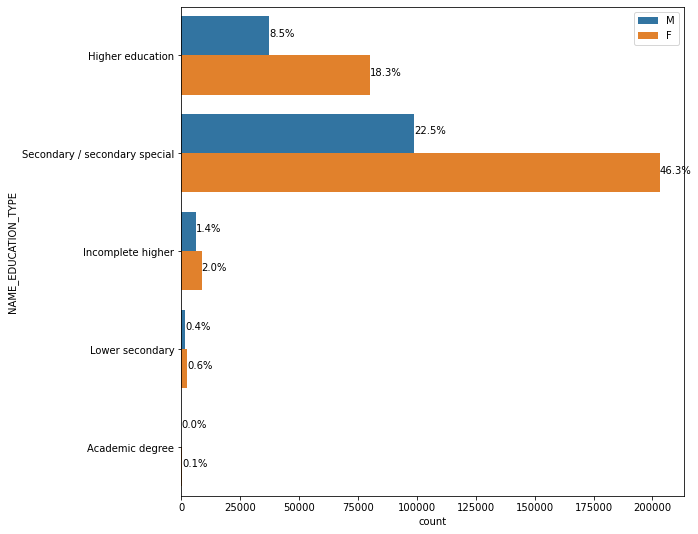

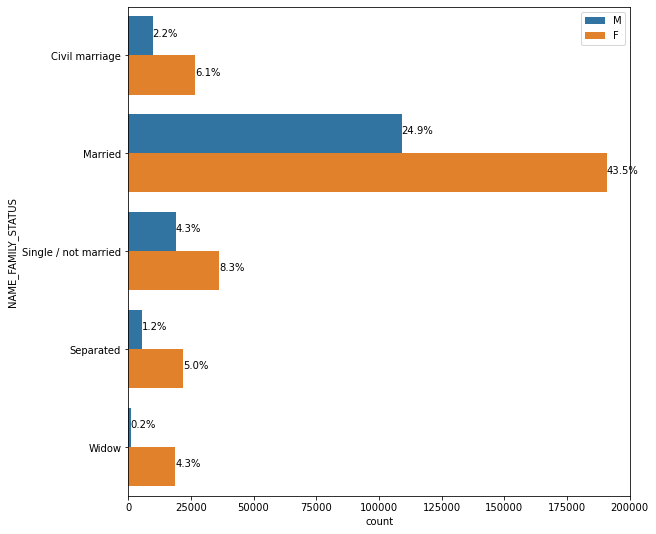

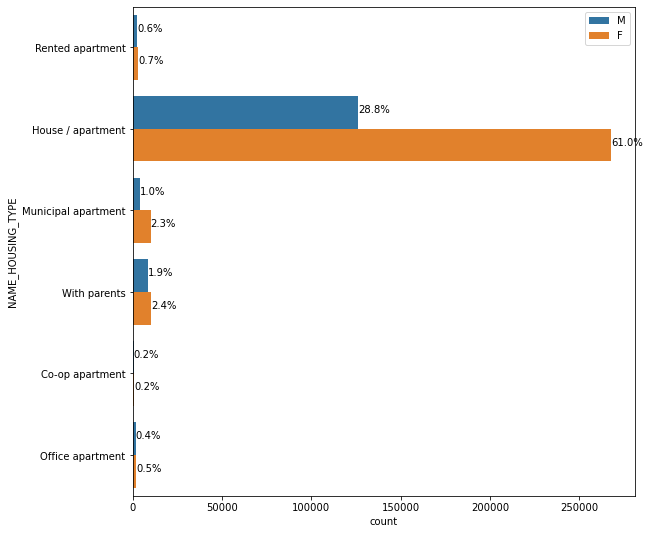

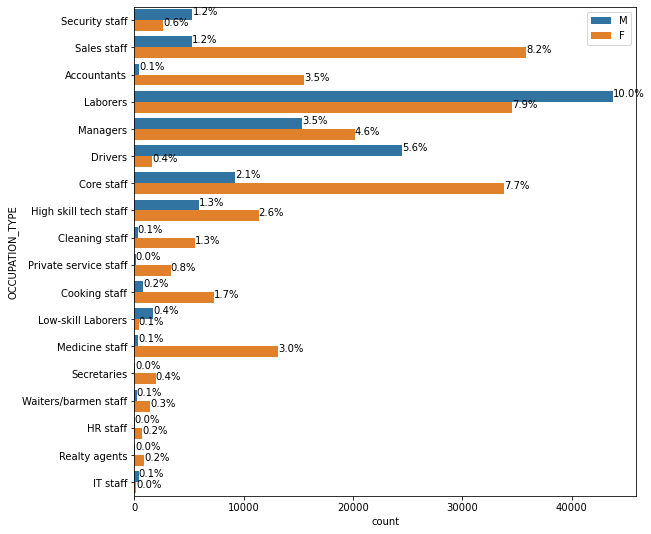

In [5]:
countplot_applicants(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'])


In [6]:
def countplot_credit(features):
    for feature in features:
        plt.figure(figsize=(9, 9))
        ax=sns.countplot(y=credit_record[feature], data=credit_record)
        total = len(credit_record[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

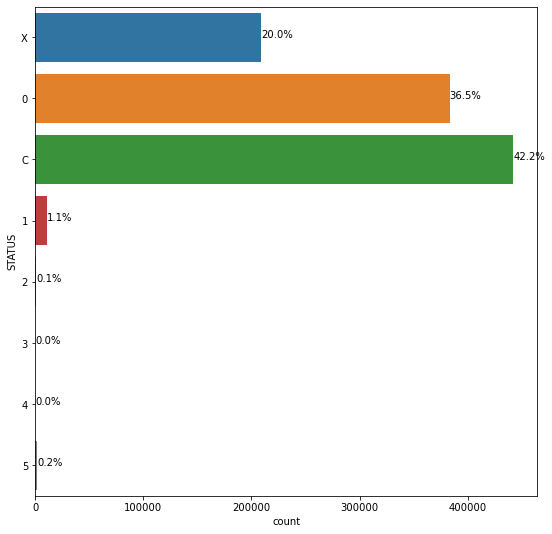

In [7]:
countplot_credit(['STATUS'])

Insights from the CountPlot Analysis: 
credit_record C: loan for that month is already paid 
X: no loan for that month 
0: loan is 1 to 29 days overdue 
1: loan is 30 to 59 days overdue 
2: loan is 60 to 89 days overdue 
3:loan is 90 to 119 days overdue 
4: loan is 120 to 149 days overdue 
5: loan is more than 150 days overdue

a. 20% of applicatnts does'nt have loan of the current month.
b. 36.5% of applicants have overdue for 1-29 days.
c. 42.2% of applicants already paid current month loan. 
d. 1.1% of applicants have overdue for 30-59 days. 
e. 0.1% of applicants have overdue for 60-89 days. 
f. 0% of applicants have overdue for 90-119 days.
g. 0% of applicants have overdue for 120-149 days.
h. 0.2% of applicants have overdue for 150 days.

# Data cleaning

# Finding Missing Values: application_details

CountPlot analysis occupation in terms of education

In [8]:
def countplot_occupation(features):
    for feature in features:
        plt.figure(figsize=(30, 30))
        ax=sns.countplot(y=application_details[feature], hue='NAME_EDUCATION_TYPE' , data=application_details)
        plt.legend(loc='best')
        total = len(application_details[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

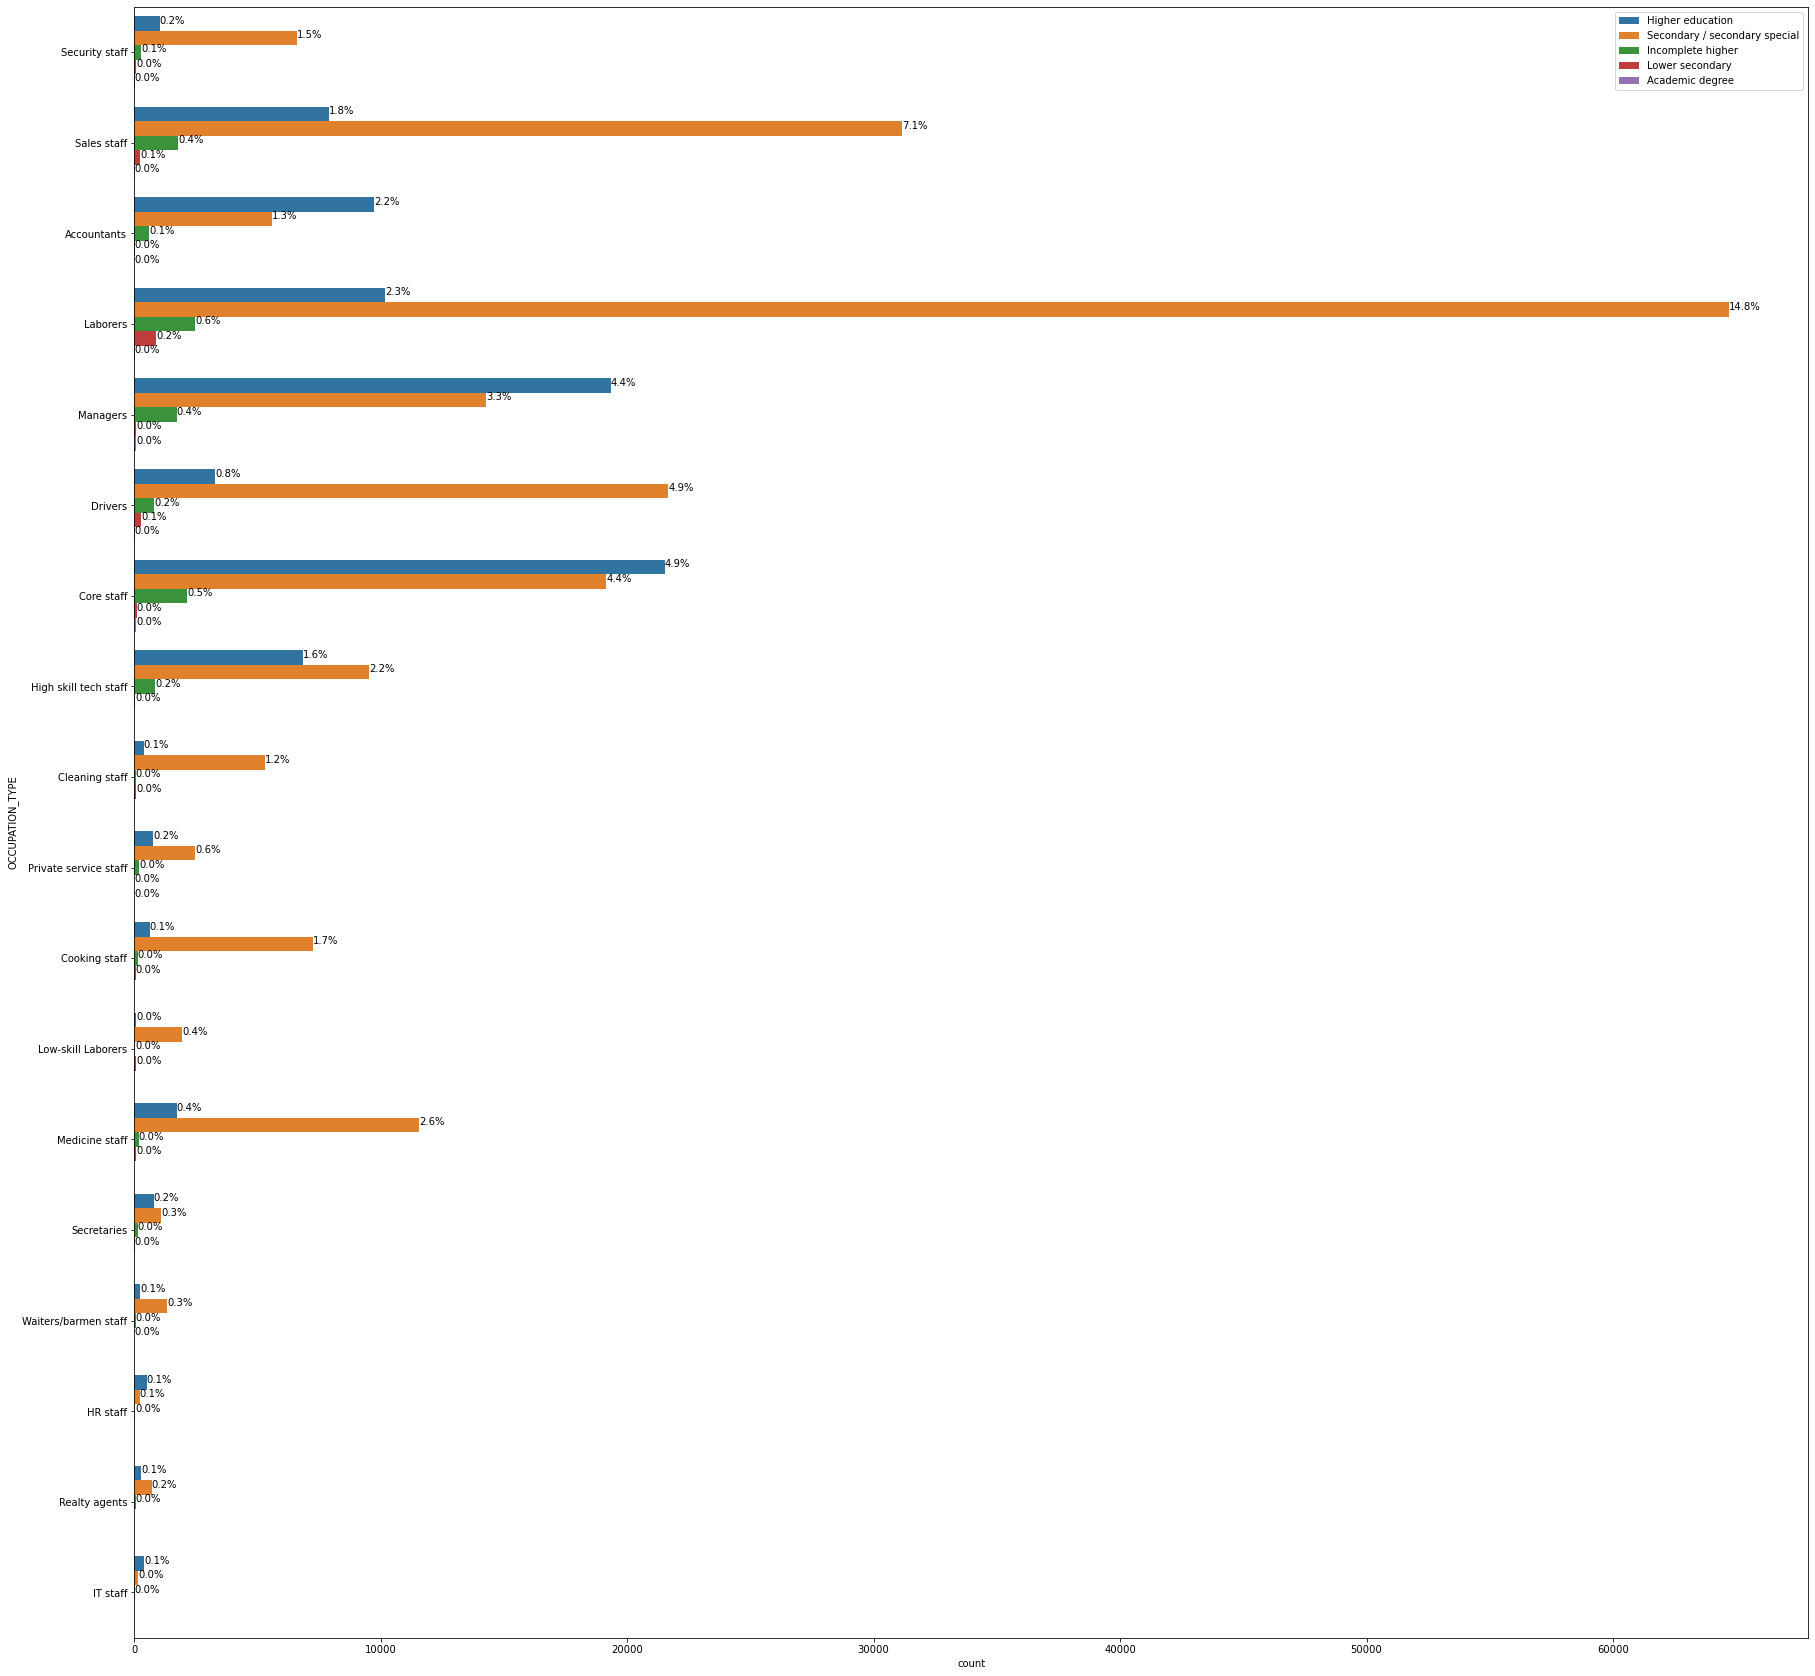

In [9]:
countplot_occupation(['OCCUPATION_TYPE'])

In [10]:
def occupation_by_education_by_gender(occupations, educations, genders, length):
    Gender = []
    Education = []
    Occupation = []
    Percentage = []
    for gender in genders:
        for education in educations:
            for occupation in occupations:
                Gender.append(gender)
                Education.append(education)
                Occupation.append(occupation)
                temp_df_1=application_details.loc[application_details['OCCUPATION_TYPE'] == occupation]
                temp_df_2=temp_df_1.loc[temp_df_1['CODE_GENDER'] == gender]
                temp_df_3=temp_df_2.loc[temp_df_2['NAME_EDUCATION_TYPE'] == education]
                length_filter = len(temp_df_3)
                Percentage.append(length_filter/length)
    percent_dict={
        'Gender': Gender,
        'Education': Education,
        'Occupation': Occupation,
        'Popularity Percentage': Percentage
    }
    df = pd.DataFrame(percent_dict)
    df.to_excel('Occupation_popularity_index.xlsx', index=False)

In [11]:
occupation_by_education_by_gender(list(application_details['OCCUPATION_TYPE'].unique()), list(application_details['NAME_EDUCATION_TYPE'].unique()), list(application_details['CODE_GENDER'].unique()), len(application_details))

In [14]:
occupation_popularity = pd.read_excel('Occupation_popularity_index.xlsx')
occupation_popularity


,Gender,Education,Occupation,Popularity Percentage
0,M,Higher education,NaN,0.000000
1,M,Higher education,Security staff,0.001751
2,M,Higher education,Sales staff,0.004068
3,M,Higher education,Accountants,0.000869
4,M,Higher education,Laborers,0.013955
...,...,...,...,...
185,F,Academic degree,Secretaries,0.000000
186,F,Academic degree,Waiters/barmen staff,0.000000
187,F,Academic degree,HR staff,0.000000
188,F,Academic degree,Realty agents,0.000000


# Replacing blank 'OCCUPATION_TYPE' with most popular occupation

In [15]:
occupation_popularity['Tag'] = occupation_popularity['Gender']+ '_' + occupation_popularity['Education']

Creating 'Tag' vs. popularity dictionary

In [16]:

def Dict(data):
    tag_list=list(data['Tag'].unique())
    popular_occupation = []
    data_grouped = data.groupby('Tag')
    for tag in tag_list:
        grouped_data = data_grouped.get_group(tag)
        popular_occupation.append(grouped_data.loc[grouped_data['Popularity Percentage'] == max(list(grouped_data['Popularity Percentage']))]['Occupation'].tolist()[0])
    Tag_dict={
        'Tag': tag_list,
        'Occupation': popular_occupation
    }
    return Tag_dict

In [22]:

dict_df = Dict(occupation_popularity)
dict_df 


{'Tag': ['M_Higher education',
  'M_Secondary / secondary special',
  'M_Incomplete higher',
  'M_Lower secondary',
  'M_Academic degree',
  'F_Higher education',
  'F_Secondary / secondary special',
  'F_Incomplete higher',
  'F_Lower secondary',
  'F_Academic degree'],
 'Occupation': ['Managers',
  'Laborers',
  'Laborers',
  'Laborers',
  'Core staff',
  'Core staff',
  'Laborers',
  'Core staff',
  'Laborers',
  'Managers']}

In [23]:
pd.DataFrame(dict_df).to_excel('Tag_vs_Occupation.xlsx', index=False)

In [24]:
tag_data = pd.read_excel('Tag_vs_Occupation.xlsx')


In [25]:
tag_data

,Tag,Occupation
0,M_Higher education,Managers
1,M_Secondary / secondary special,Laborers
2,M_Incomplete higher,Laborers
3,M_Lower secondary,Laborers
4,M_Academic degree,Core staff
5,F_Higher education,Core staff
6,F_Secondary / secondary special,Laborers
7,F_Incomplete higher,Core staff
8,F_Lower secondary,Laborers
9,F_Academic degree,Managers


In [26]:
tag_g = list(tag_data['Tag'])
occu_g = list(tag_data['Occupation'])
tag_dict = {}
for index in range(len(tag_g)):
    tag_dict[tag_g[index]] = occu_g[index]

In [27]:
tag_dict

{'M_Higher education': 'Managers',
 'M_Secondary / secondary special': 'Laborers',
 'M_Incomplete higher': 'Laborers',
 'M_Lower secondary': 'Laborers',
 'M_Academic degree': 'Core staff',
 'F_Higher education': 'Core staff',
 'F_Secondary / secondary special': 'Laborers',
 'F_Incomplete higher': 'Core staff',
 'F_Lower secondary': 'Laborers',
 'F_Academic degree': 'Managers'}

In [28]:
application_details['Tag'] = application_details['CODE_GENDER']+ '_' + application_details['NAME_EDUCATION_TYPE']


In [29]:
def Replace_nan_occupation(df):    
    for key in tag_dict:
        if df['Tag'] == key and pd.isnull(df['OCCUPATION_TYPE']):
            df['OCCUPATION_TYPE'] = tag_dict[key]
    return df

In [30]:
len(application_details)

438557

In [31]:
application_details = application_details.apply(Replace_nan_occupation, axis=1)

In [32]:
len(application_details)

438557

In [33]:
application_details.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
Tag                    0
dtype: int64

In [34]:
application_details

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Tag
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Managers,2.0,M_Higher education
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Managers,2.0,M_Higher education
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,M_Secondary / secondary special
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,F_Secondary / secondary special
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,F_Secondary / secondary special
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,Laborers,1.0,M_Secondary / secondary special
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0,F_Secondary / secondary special
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0,F_Higher education
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,Laborers,2.0,F_Secondary / secondary special


No of days convert it into their datetime format

In [35]:
def Date_of_Birth(total_days):
    today = datetime.date.today()
    birthday = (today + timedelta(days=total_days)).strftime('%Y-%m-%d')
    return birthday                  

## This Function takes value of colunn Days of Employed and convert it into datetime format
def Employed_day(total_days):
    today = datetime.date.today()
    employed_date = (today + datetime.timedelta(days=total_days)).strftime('%Y-%m-%d')

In [36]:
application_details['DAYS_BIRTH']=application_details['DAYS_BIRTH'].apply(Date_of_Birth)
application_details['DAYS_EMPLOYED']=application_details['DAYS_EMPLOYED'].apply(Date_of_Birth)
application_details.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Tag
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1990-03-28,2010-09-02,1,1,0,0,Managers,2.0,M_Higher education
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1990-03-28,2010-09-02,1,1,0,0,Managers,2.0,M_Higher education
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1964-04-24,2020-01-01,1,0,0,0,Security staff,2.0,M_Secondary / secondary special
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1970-10-14,2014-10-02,1,0,1,1,Sales staff,1.0,F_Secondary / secondary special
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1970-10-14,2014-10-02,1,0,1,1,Sales staff,1.0,F_Secondary / secondary special


In [37]:
application_details['NAME_FAMILY_STATUS'].value_counts()

Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow                    19675
Name: NAME_FAMILY_STATUS, dtype: int64

In [38]:
def fun(x):
    if x=='Single / not married':
        x=x.split(' / ')[0]
    return x

In [39]:
application_details['NAME_FAMILY_STATUS']=application_details['NAME_FAMILY_STATUS'].apply(fun)
application_details['NAME_FAMILY_STATUS'].value_counts()

Married           299828
Single             55271
Civil marriage     36532
Separated          27251
Widow              19675
Name: NAME_FAMILY_STATUS, dtype: int64

In [40]:
application_details['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64

In [41]:
def education(x):
    if x=='Secondary / secondary special':
        x=x.split(' / ')[0]
    return x

In [42]:
application_details['NAME_EDUCATION_TYPE']=application_details['NAME_EDUCATION_TYPE'].apply(education)

In [43]:
application_details['NAME_EDUCATION_TYPE'].value_counts()

Secondary            301821
Higher education     117522
Incomplete higher     14851
Lower secondary        4051
Academic degree         312
Name: NAME_EDUCATION_TYPE, dtype: int64

In [44]:
application_details

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Tag
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1990-03-28,2010-09-02,1,1,0,0,Managers,2.0,M_Higher education
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1990-03-28,2010-09-02,1,1,0,0,Managers,2.0,M_Higher education
2,5008806,M,Y,Y,0,112500.0,Working,Secondary,Married,House / apartment,1964-04-24,2020-01-01,1,0,0,0,Security staff,2.0,M_Secondary / secondary special
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary,Single,House / apartment,1970-10-14,2014-10-02,1,0,1,1,Sales staff,1.0,F_Secondary / secondary special
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary,Single,House / apartment,1970-10-14,2014-10-02,1,0,1,1,Sales staff,1.0,F_Secondary / secondary special
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary,Separated,House / apartment,1960-11-28,3023-02-09,1,0,0,0,Laborers,1.0,M_Secondary / secondary special
438553,6840222,F,N,N,0,103500.0,Working,Secondary,Single,House / apartment,1979-06-20,2014-11-15,1,0,0,0,Laborers,1.0,F_Secondary / secondary special
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single,With parents,2000-09-27,2022-02-01,1,1,0,0,Sales staff,1.0,F_Higher education
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary,Married,House / apartment,1963-10-08,3023-02-09,1,0,0,0,Laborers,2.0,F_Secondary / secondary special


# Credit_record data

In [45]:
convert_to = {'C' : 'Good_Debt', 'X' : 'Good_Debt', '0' : 'Good_Debt', '1' : 'Neutral_Debt', '2' : 'Neutral_Debt', '3' : 'Bad_Debt', '4' : 'Bad_Debt', '5' : 'Bad_Debt'}
credit_record.replace({'STATUS' : convert_to}, inplace=True)

In [46]:
credit_record


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,Good_Debt
1,5001711,-1,Good_Debt
2,5001711,-2,Good_Debt
3,5001711,-3,Good_Debt
4,5001712,0,Good_Debt
...,...,...,...
1048570,5150487,-25,Good_Debt
1048571,5150487,-26,Good_Debt
1048572,5150487,-27,Good_Debt
1048573,5150487,-28,Good_Debt


In [47]:
credit_record = credit_record.value_counts(subset=['ID', 'STATUS']).unstack(fill_value=0)

In [48]:
credit_record

STATUS,Bad_Debt,Good_Debt,Neutral_Debt
ID,,,
5001711,0,4,0
5001712,0,19,0
5001713,0,22,0
5001714,0,15,0
5001715,0,60,0
...,...,...,...
5150482,0,18,0
5150483,0,18,0
5150484,0,13,0


Creating Credit Approval Status

In [49]:
credit_record.loc[(credit_record['Good_Debt'] > credit_record['Neutral_Debt']), 'CREDIT_APPROVAL_STATUS'] = 1
credit_record.loc[(credit_record['Good_Debt'] > credit_record['Bad_Debt']), 'CREDIT_APPROVAL_STATUS'] = 1
credit_record.loc[(credit_record['Neutral_Debt'] > credit_record['Good_Debt']), 'CREDIT_APPROVAL_STATUS'] = 0
credit_record.loc[(credit_record['Neutral_Debt'] > credit_record['Bad_Debt']), 'CREDIT_APPROVAL_STATUS'] = 1
credit_record.loc[(credit_record['Bad_Debt'] > credit_record['Good_Debt']), 'CREDIT_APPROVAL_STATUS'] = 0
credit_record.loc[(credit_record['Bad_Debt'] > credit_record['Neutral_Debt']), 'CREDIT_APPROVAL_STATUS'] = 0


In [50]:
credit_record

STATUS,Bad_Debt,Good_Debt,Neutral_Debt,CREDIT_APPROVAL_STATUS
ID,,,,
5001711,0,4,0,1.0
5001712,0,19,0,1.0
5001713,0,22,0,1.0
5001714,0,15,0,1.0
5001715,0,60,0,1.0
...,...,...,...,...
5150482,0,18,0,1.0
5150483,0,18,0,1.0
5150484,0,13,0,1.0


In [51]:
np.unique(credit_record['CREDIT_APPROVAL_STATUS'])

array([0., 1.])

In [52]:
credit_record['CREDIT_APPROVAL_STATUS'] = credit_record['CREDIT_APPROVAL_STATUS'].astype('int')

In [53]:
credit_record

STATUS,Bad_Debt,Good_Debt,Neutral_Debt,CREDIT_APPROVAL_STATUS
ID,,,,
5001711,0,4,0,1
5001712,0,19,0,1
5001713,0,22,0,1
5001714,0,15,0,1
5001715,0,60,0,1
...,...,...,...,...
5150482,0,18,0,1
5150483,0,18,0,1
5150484,0,13,0,1


In [54]:
credit_record.drop(['Bad_Debt', 'Good_Debt', 'Neutral_Debt'], axis=1, inplace=True)

In [55]:
credit_record

STATUS,CREDIT_APPROVAL_STATUS
ID,
5001711,1
5001712,1
5001713,1
5001714,1
5001715,1
...,...
5150482,1
5150483,1
5150484,1


# Merging of Data

In [56]:
data = application_details.merge(credit_record,how='inner',on=['ID'])
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Tag,CREDIT_APPROVAL_STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1990-03-28,2010-09-02,1,1,0,0,Managers,2.0,M_Higher education,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1990-03-28,2010-09-02,1,1,0,0,Managers,2.0,M_Higher education,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary,Married,House / apartment,1964-04-24,2020-01-01,1,0,0,0,Security staff,2.0,M_Secondary / secondary special,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary,Single,House / apartment,1970-10-14,2014-10-02,1,0,1,1,Sales staff,1.0,F_Secondary / secondary special,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary,Single,House / apartment,1970-10-14,2014-10-02,1,0,1,1,Sales staff,1.0,F_Secondary / secondary special,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary,Married,House / apartment,1975-08-11,2016-06-24,1,0,0,0,Managers,2.0,M_Secondary / secondary special,0
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,1989-03-11,2019-06-24,1,0,1,1,Medicine staff,2.0,F_Higher education,0
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,1989-03-11,2019-06-24,1,0,1,1,Medicine staff,2.0,F_Higher education,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary,Married,House / apartment,1973-12-09,2021-04-24,1,0,0,0,Sales staff,2.0,F_Secondary / secondary special,1


In [57]:
 data.to_excel('data.xlsx', sheet_name='data')

In [58]:
data = pd.read_excel('data.xlsx')

In [59]:
data

,Unnamed: 0,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Tag,CREDIT_APPROVAL_STATUS
0,0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1990-03-28,2010-09-02,1,1,0,0,Managers,2,M_Higher education,1
1,1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1990-03-28,2010-09-02,1,1,0,0,Managers,2,M_Higher education,1
2,2,5008806,M,Y,Y,0,112500.0,Working,Secondary,Married,House / apartment,1964-04-24,2020-01-01,1,0,0,0,Security staff,2,M_Secondary / secondary special,1
3,3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary,Single,House / apartment,1970-10-14,2014-10-02,1,0,1,1,Sales staff,1,F_Secondary / secondary special,1
4,4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary,Single,House / apartment,1970-10-14,2014-10-02,1,0,1,1,Sales staff,1,F_Secondary / secondary special,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,36452,5149828,M,Y,Y,0,315000.0,Working,Secondary,Married,House / apartment,1975-08-11,2016-06-24,1,0,0,0,Managers,2,M_Secondary / secondary special,0
36453,36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,1989-03-11,2019-06-24,1,0,1,1,Medicine staff,2,F_Higher education,0
36454,36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,1989-03-11,2019-06-24,1,0,1,1,Medicine staff,2,F_Higher education,1
36455,36455,5150049,F,N,Y,0,283500.0,Working,Secondary,Married,House / apartment,1973-12-09,2021-04-24,1,0,0,0,Sales staff,2,F_Secondary / secondary special,1


In [60]:
data.isnull().sum()  

Unnamed: 0                0
ID                        0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
NAME_INCOME_TYPE          0
NAME_EDUCATION_TYPE       0
NAME_FAMILY_STATUS        0
NAME_HOUSING_TYPE         0
DAYS_BIRTH                0
DAYS_EMPLOYED             0
FLAG_MOBIL                0
FLAG_WORK_PHONE           0
FLAG_PHONE                0
FLAG_EMAIL                0
OCCUPATION_TYPE           0
CNT_FAM_MEMBERS           0
Tag                       0
CREDIT_APPROVAL_STATUS    0
dtype: int64

In [61]:
data.shape

(36457, 21)

In [62]:
data.describe()

,Unnamed: 0,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CREDIT_APPROVAL_STATUS
count,36457.000000,3.645700e+04,36457.000000,3.645700e+04,36457.0,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,18228.000000,5.078227e+06,0.430315,1.866857e+05,1.0,0.225526,0.294813,0.089722,2.198453,0.995172
std,10524.373719,4.187524e+04,0.742367,1.017892e+05,0.0,0.417934,0.455965,0.285787,0.911686,0.069314
min,0.000000,5.008804e+06,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,9114.000000,5.042028e+06,0.000000,1.215000e+05,1.0,0.000000,0.000000,0.000000,2.000000,1.000000
50%,18228.000000,5.074614e+06,0.000000,1.575000e+05,1.0,0.000000,0.000000,0.000000,2.000000,1.000000
75%,27342.000000,5.115396e+06,1.000000,2.250000e+05,1.0,0.000000,1.000000,0.000000,3.000000,1.000000
max,36456.000000,5.150487e+06,19.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,20.000000,1.000000


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              36457 non-null  int64  
 1   ID                      36457 non-null  int64  
 2   CODE_GENDER             36457 non-null  object 
 3   FLAG_OWN_CAR            36457 non-null  object 
 4   FLAG_OWN_REALTY         36457 non-null  object 
 5   CNT_CHILDREN            36457 non-null  int64  
 6   AMT_INCOME_TOTAL        36457 non-null  float64
 7   NAME_INCOME_TYPE        36457 non-null  object 
 8   NAME_EDUCATION_TYPE     36457 non-null  object 
 9   NAME_FAMILY_STATUS      36457 non-null  object 
 10  NAME_HOUSING_TYPE       36457 non-null  object 
 11  DAYS_BIRTH              36457 non-null  object 
 12  DAYS_EMPLOYED           36457 non-null  object 
 13  FLAG_MOBIL              36457 non-null  int64  
 14  FLAG_WORK_PHONE         36457 non-null

In [64]:
data.corr()

,Unnamed: 0,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CREDIT_APPROVAL_STATUS
Unnamed: 0,1.000000,0.933363,0.035095,-0.016250,NaN,0.081790,0.004973,-0.047370,0.032990,-0.074110
ID,0.933363,1.000000,0.028878,-0.017667,NaN,0.079215,0.009879,-0.046979,0.026624,-0.008189
CNT_CHILDREN,0.035095,0.028878,1.000000,0.033691,NaN,0.048091,-0.016291,0.015960,0.889114,0.005190
AMT_INCOME_TOTAL,-0.016250,-0.017667,0.033691,1.000000,NaN,-0.037746,0.017245,0.086681,0.023750,-0.004476
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,0.081790,0.079215,0.048091,-0.037746,NaN,1.000000,0.311644,-0.034838,0.064527,0.004443
FLAG_PHONE,0.004973,0.009879,-0.016291,0.017245,NaN,0.311644,1.000000,0.010455,-0.004221,-0.007909
FLAG_EMAIL,-0.047370,-0.046979,0.015960,0.086681,NaN,-0.034838,0.010455,1.000000,0.014619,-0.000289
CNT_FAM_MEMBERS,0.032990,0.026624,0.889114,0.023750,NaN,0.064527,-0.004221,0.014619,1.000000,0.005178
CREDIT_APPROVAL_STATUS,-0.074110,-0.008189,0.005190,-0.004476,NaN,0.004443,-0.007909,-0.000289,0.005178,1.000000


In [65]:
#FLAG_MOBIL column is not correlated to any feature so let's drop the that column
data.drop('FLAG_MOBIL',inplace=True,axis=1)

In [66]:
data

,Unnamed: 0,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Tag,CREDIT_APPROVAL_STATUS
0,0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1990-03-28,2010-09-02,1,0,0,Managers,2,M_Higher education,1
1,1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1990-03-28,2010-09-02,1,0,0,Managers,2,M_Higher education,1
2,2,5008806,M,Y,Y,0,112500.0,Working,Secondary,Married,House / apartment,1964-04-24,2020-01-01,0,0,0,Security staff,2,M_Secondary / secondary special,1
3,3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary,Single,House / apartment,1970-10-14,2014-10-02,0,1,1,Sales staff,1,F_Secondary / secondary special,1
4,4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary,Single,House / apartment,1970-10-14,2014-10-02,0,1,1,Sales staff,1,F_Secondary / secondary special,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,36452,5149828,M,Y,Y,0,315000.0,Working,Secondary,Married,House / apartment,1975-08-11,2016-06-24,0,0,0,Managers,2,M_Secondary / secondary special,0
36453,36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,1989-03-11,2019-06-24,0,1,1,Medicine staff,2,F_Higher education,0
36454,36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,1989-03-11,2019-06-24,0,1,1,Medicine staff,2,F_Higher education,1
36455,36455,5150049,F,N,Y,0,283500.0,Working,Secondary,Married,House / apartment,1973-12-09,2021-04-24,0,0,0,Sales staff,2,F_Secondary / secondary special,1


In [67]:
## This function takes no of days and convert it into their datetime format
def Date_of_Birth(total_days):
    today = datetime.date.today()
    birthday = (today + timedelta(days=total_days)).strftime('%Y-%m-%d')
    return birthday                  

## This Function takes value of colunn Days of Employed and convert it into datetime format
def Employed_day(total_days):
    today = datetime.date.today()
    employed_date = (today + datetime.timedelta(days=total_days)).strftime('%Y-%m-%d')

data['DAYS_BIRTH']=data['DAYS_BIRTH'].apply(Date_of_Birth)
data['DAYS_EMPLOYED']=data['DAYS_EMPLOYED'].apply(Date_of_Birth)
data.head()

In [68]:
#let's create a function to calculate age of the employee
def AGE(date_of_birth):
    today=datetime.date.today()
    dateofbirth=datetime.datetime.strptime(date_of_birth,'%Y-%m-%d')
    age=today.year-dateofbirth.year
    return age
data['DAYS_BIRTH']=data['DAYS_BIRTH'].apply(AGE)
data.head()

,Unnamed: 0,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Tag,CREDIT_APPROVAL_STATUS
0,0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,2010-09-02,1,0,0,Managers,2,M_Higher education,1
1,1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,2010-09-02,1,0,0,Managers,2,M_Higher education,1
2,2,5008806,M,Y,Y,0,112500.0,Working,Secondary,Married,House / apartment,59,2020-01-01,0,0,0,Security staff,2,M_Secondary / secondary special,1
3,3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary,Single,House / apartment,53,2014-10-02,0,1,1,Sales staff,1,F_Secondary / secondary special,1
4,4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary,Single,House / apartment,53,2014-10-02,0,1,1,Sales staff,1,F_Secondary / secondary special,1


In [69]:
data.rename(columns={'DAYS_BIRTH':'Age'},inplace=True)
data['DAYS_EMPLOYED']=data['DAYS_EMPLOYED'].apply(AGE)
data.head(2)

,Unnamed: 0,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,Age,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Tag,CREDIT_APPROVAL_STATUS
0,0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,13,1,0,0,Managers,2,M_Higher education,1
1,1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,13,1,0,0,Managers,2,M_Higher education,1


In [70]:
data.rename(columns={'DAYS_EMPLOYED':'Days_worked'})

,Unnamed: 0,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,Age,Days_worked,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Tag,CREDIT_APPROVAL_STATUS
0,0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,13,1,0,0,Managers,2,M_Higher education,1
1,1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,13,1,0,0,Managers,2,M_Higher education,1
2,2,5008806,M,Y,Y,0,112500.0,Working,Secondary,Married,House / apartment,59,3,0,0,0,Security staff,2,M_Secondary / secondary special,1
3,3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary,Single,House / apartment,53,9,0,1,1,Sales staff,1,F_Secondary / secondary special,1
4,4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary,Single,House / apartment,53,9,0,1,1,Sales staff,1,F_Secondary / secondary special,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,36452,5149828,M,Y,Y,0,315000.0,Working,Secondary,Married,House / apartment,48,7,0,0,0,Managers,2,M_Secondary / secondary special,0
36453,36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,34,4,0,1,1,Medicine staff,2,F_Higher education,0
36454,36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,34,4,0,1,1,Medicine staff,2,F_Higher education,1
36455,36455,5150049,F,N,Y,0,283500.0,Working,Secondary,Married,House / apartment,50,2,0,0,0,Sales staff,2,F_Secondary / secondary special,1


# Data Visualisation

In [71]:
data.corr()

,Unnamed: 0,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,Age,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CREDIT_APPROVAL_STATUS
Unnamed: 0,1.000000,0.933363,0.035095,-0.016250,-0.057807,0.038782,0.081790,0.004973,-0.047370,0.032990,-0.074110
ID,0.933363,1.000000,0.028878,-0.017667,-0.056181,0.038054,0.079215,0.009879,-0.046979,0.026624,-0.008189
CNT_CHILDREN,0.035095,0.028878,1.000000,0.033691,-0.339605,0.229372,0.048091,-0.016291,0.015960,0.889114,0.005190
AMT_INCOME_TOTAL,-0.016250,-0.017667,0.033691,1.000000,-0.067297,0.168598,-0.037746,0.017245,0.086681,0.023750,-0.004476
Age,-0.057807,-0.056181,-0.339605,-0.067297,1.000000,-0.615892,-0.179167,0.028646,-0.106019,-0.304238,-0.015414
DAYS_EMPLOYED,0.038782,0.038054,0.229372,0.168598,-0.615892,1.000000,0.242882,0.007210,0.085651,0.221239,0.007983
FLAG_WORK_PHONE,0.081790,0.079215,0.048091,-0.037746,-0.179167,0.242882,1.000000,0.311644,-0.034838,0.064527,0.004443
FLAG_PHONE,0.004973,0.009879,-0.016291,0.017245,0.028646,0.007210,0.311644,1.000000,0.010455,-0.004221,-0.007909
FLAG_EMAIL,-0.047370,-0.046979,0.015960,0.086681,-0.106019,0.085651,-0.034838,0.010455,1.000000,0.014619,-0.000289
CNT_FAM_MEMBERS,0.032990,0.026624,0.889114,0.023750,-0.304238,0.221239,0.064527,-0.004221,0.014619,1.000000,0.005178


In [72]:
data.corr().T

,Unnamed: 0,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,Age,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CREDIT_APPROVAL_STATUS
Unnamed: 0,1.000000,0.933363,0.035095,-0.016250,-0.057807,0.038782,0.081790,0.004973,-0.047370,0.032990,-0.074110
ID,0.933363,1.000000,0.028878,-0.017667,-0.056181,0.038054,0.079215,0.009879,-0.046979,0.026624,-0.008189
CNT_CHILDREN,0.035095,0.028878,1.000000,0.033691,-0.339605,0.229372,0.048091,-0.016291,0.015960,0.889114,0.005190
AMT_INCOME_TOTAL,-0.016250,-0.017667,0.033691,1.000000,-0.067297,0.168598,-0.037746,0.017245,0.086681,0.023750,-0.004476
Age,-0.057807,-0.056181,-0.339605,-0.067297,1.000000,-0.615892,-0.179167,0.028646,-0.106019,-0.304238,-0.015414
DAYS_EMPLOYED,0.038782,0.038054,0.229372,0.168598,-0.615892,1.000000,0.242882,0.007210,0.085651,0.221239,0.007983
FLAG_WORK_PHONE,0.081790,0.079215,0.048091,-0.037746,-0.179167,0.242882,1.000000,0.311644,-0.034838,0.064527,0.004443
FLAG_PHONE,0.004973,0.009879,-0.016291,0.017245,0.028646,0.007210,0.311644,1.000000,0.010455,-0.004221,-0.007909
FLAG_EMAIL,-0.047370,-0.046979,0.015960,0.086681,-0.106019,0.085651,-0.034838,0.010455,1.000000,0.014619,-0.000289
CNT_FAM_MEMBERS,0.032990,0.026624,0.889114,0.023750,-0.304238,0.221239,0.064527,-0.004221,0.014619,1.000000,0.005178


<AxesSubplot:>

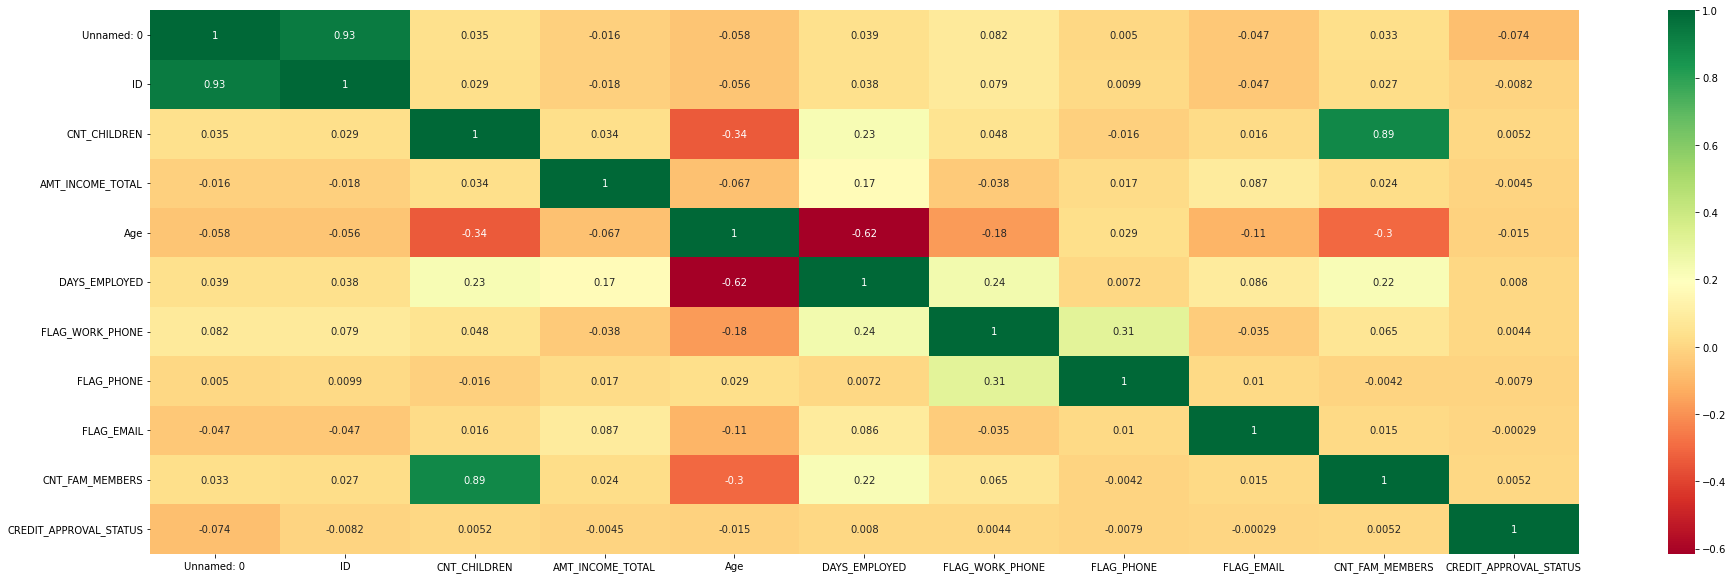

In [73]:
plt.figure(figsize=(32,10))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')


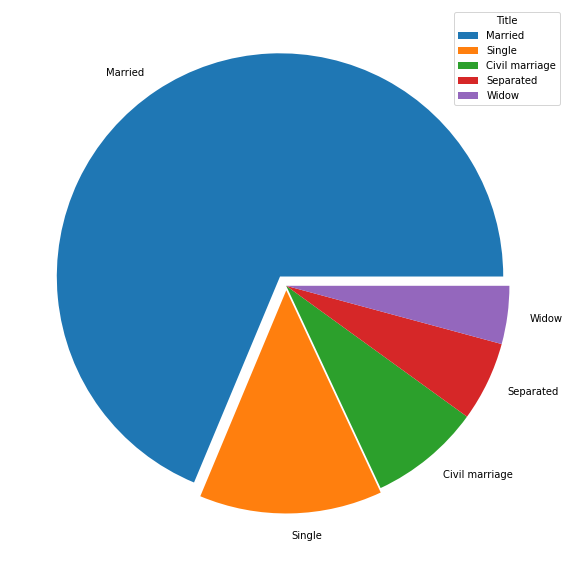

In [74]:
plt.figure(figsize=(10,12))
e=(0.05,0.02,0,0,0)
m=data['NAME_FAMILY_STATUS']=='Married'
m=m.sum()
s=data['NAME_FAMILY_STATUS']=='Single'
s=s.sum()
Cv=data['NAME_FAMILY_STATUS']=='Civil marriage'
Cv=Cv.sum()
sep=data['NAME_FAMILY_STATUS']=='Separated'
sep=sep.sum()
w=data['NAME_FAMILY_STATUS']=='Widow'
w=w.sum()
y=np.array([m,s,Cv,sep,w])
label=['Married','Single','Civil marriage','Separated','Widow']
plt.pie(y,explode=e,labels=label)
plt.legend(title="Title")

From the above pie chart ,we conclude that majority of people are married so there expenses more than others.so,
we can approve their credit card bcz they can use credit card regularly and in efficient manner for their expenses.

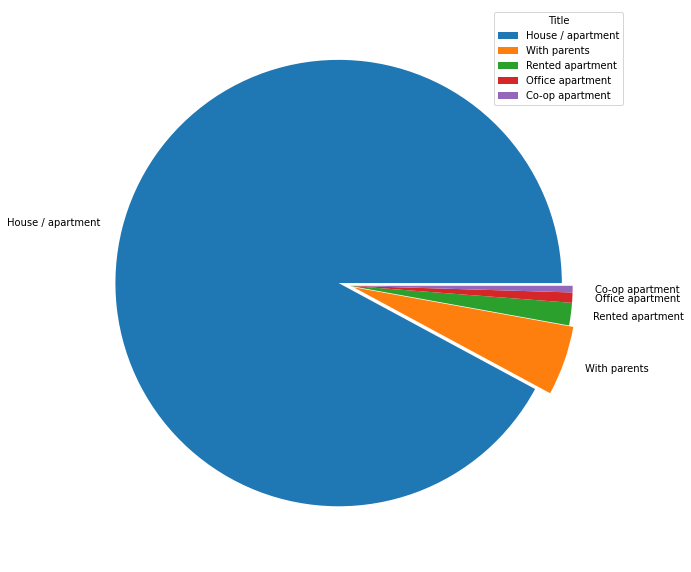

In [75]:
plt.figure(figsize=(10,12))
e=(0.05,0.02,0,0,0)
m=data['NAME_HOUSING_TYPE']=='House / apartment'
m=m.sum()
s=data['NAME_HOUSING_TYPE']=='With parents'
s=s.sum()
Cv=data['NAME_HOUSING_TYPE']=='Rented apartment'
Cv=Cv.sum()
sep=data['NAME_HOUSING_TYPE']=='Office apartment'
sep=sep.sum()
w=data['NAME_HOUSING_TYPE']=='Co-op apartment'
w=w.sum()
y=np.array([m,s,Cv,sep,w])
label=['House / apartment','With parents','Rented apartment','Office apartment','Co-op apartment']
plt.pie(y,explode=e,labels=label)
plt.legend(title="Title")

From the above pie chart ,we conclude that majority of people are married so there expenses more than others.
so, we can approve their credit card bcz they can use credit card regularly and in efficient manner for their expenses.

# Thank You
